<a href="https://colab.research.google.com/github/meghnath-lab/Fake-News-Detection-and-Evaluation/blob/main/Meghnath_Project_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# installed missing package gensim
!pip install gensim

In [ ]:
# import necessary packages
import  matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from sklearn.model_selection import train_test_split
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# mounted the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the csv file using pandas dataframe
fake_news_data = pd.read_csv('/content/drive/MyDrive/Autumn_Internship_Project/true.csv')
true_news_data = pd.read_csv('/content/drive/MyDrive/Autumn_Internship_Project/fake.csv')

Q1. View the imported csv file data using Pandas Dataframe.

Ans : This first step involves loading, labeling, and combining your two datasets into a single DataFrame.

Solution:
The code below loads the fake and true news CSVs, adds a class column to each (1 for fake, 0 for true), merges them into a single DataFrame called df, and then displays the first few rows.

In [ ]:
# Add the 'class' column to each dataframe
fake_news_data["class"] = 1  # Fake News data → 1
true_news_data["class"] = 0  # True News data → 0

# Merge the two dataframes into 'df'
merged_data = [fake_news_data, true_news_data]
df = pd.concat(merged_data, axis=0)

# After merging and adding the 'class' column, view the combined dataframe
print("\nCombined and Processed Data Head:")
display(df.head())


Combined and Processed Data Head:


,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


Some Examples :

In [ ]:
# View the fake news data
print("Fake News Data Head:")
display(fake_news_data.head())

# View the true news data
print("\nTrue News Data Head:")
display(true_news_data.head())

# After merging and adding the 'class' column, view the combined dataframe
print("\nCombined and Processed Data Head:")
display(df.head())

Fake News Data Head:


,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1



True News Data Head:


,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0



Combined and Processed Data Head:


,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


Q2. Drop rows from the dataset consisting of null values.
Data cleaning is crucial. This step removes any rows that have missing information, ensuring your dataset is complete.

Solution:
First, we check how many null values exist in each column and then drop the rows containing them.

In [ ]:
# Drop rows with any null values
df.dropna(inplace=True)

# Verify that null values are dropped
print("\nNull values after dropping:")
print(df.isnull().sum())


Null values after dropping:
title      0
text       0
subject    0
date       0
class      0
dtype: int64


Q3. Shuffle the data.
Your data is currently ordered (all fake news, then all true news). Shuffling randomizes the data, which is essential for unbiased model training.

Solution:
The .sample(frac=1) method shuffles all the rows of the DataFrame. We then reset the index.

In [ ]:
# Shuffle the DataFrame and reset the index
df = df.sample(frac=1).reset_index(drop=True)

# Display the top of the shuffled data
print("Shuffled Data Head:")
df.head()

Shuffled Data Head:


,title,text,subject,date,class
0,CONTROVERSY OVER CHRISTIAN FLAG ENGULFS SMALL ...,Local residents supported the flag but nationa...,left-news,"May 5, 2015",0
1,Trump Gets Revenge On Women’s March By Signin...,How mad is Trump that millions of women made h...,News,"January 23, 2017",0
2,NFL’S PHONY PATRIOTISM: US Defense Department ...,"Every day, the NFL gives fans another reason t...",politics,"Sep 19, 2017",0
3,U.S. airlines scramble to evacuate residents a...,(Reuters) - Airlines were racing against the c...,worldnews,"September 7, 2017",1
4,IS HILLARY GOING DOWN IN FLAMES? Latest Poll S...,The good news is the Clinton Crime Syndicate i...,politics,"Aug 4, 2015",0


Q4. View the text content of a random data point.
Inspecting a single article helps you understand the kind of text you are working with before processing it.

Solution:
This code will display the full text of the news article at index 500 (you can change the number to see a different article).

In [ ]:
# Display the text from a specific row (e.g., row at index 500)
print(df['text'][500])

WASHINGTON (Reuters) - Legislation to provide $81 billion in new disaster aid for U.S. states, Puerto Rico and the U.S. Virgin Islands was put on hold by the Senate on Thursday amid attacks from both Republicans and Democrats. The Republican-controlled House of Representatives passed the legislation earlier on Thursday to help recovery efforts stemming from hurricanes and wildfires. But the Senate put off a vote until at least January, according to some lawmakers and aides, after Democrats complained Puerto Rico was not getting enough help and some fiscal hawks fretted about the overall cost. 


Q5. Create a pie chart to find the percentage of news on different subjects.
A pie chart is a great way to visualize the proportion of articles for each subject, helping you understand the dataset's composition. 📊

Solution:
This code counts the articles for each subject and plots the results as a pie chart.

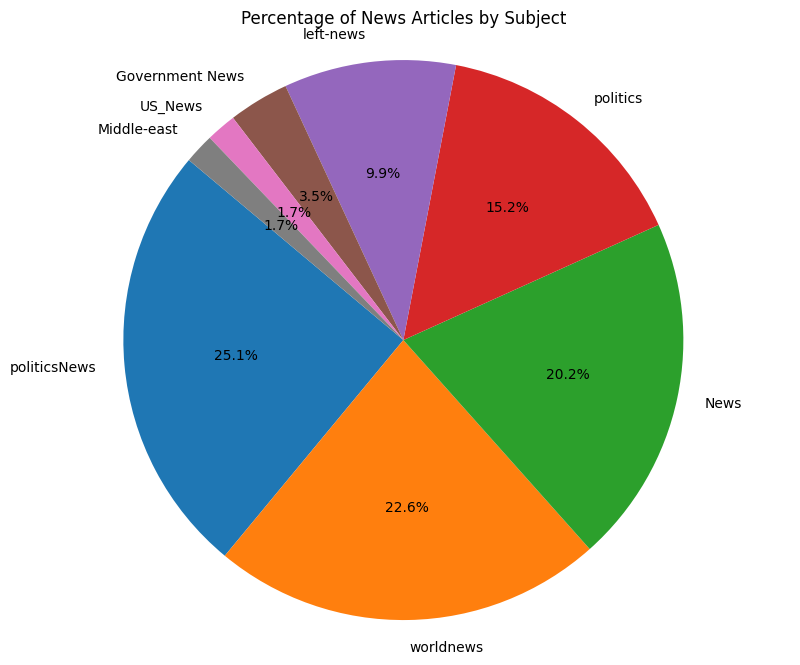

In [ ]:
# Get the counts for each subject
subject_counts = df['subject'].value_counts()

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(subject_counts, labels=subject_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of News Articles by Subject')
plt.axis('equal')  # Ensures the pie chart is a circle
plt.show()

Q6. Split the dataset into training and testing sets.
This is a fundamental step in machine learning. You'll use the majority of your data to train the model and a smaller portion to test how well it performs on unseen data.

Solution:
The train_test_split function divides the data, with test_size=0.25 allocating 25% of the data for the test set.

In [ ]:
# 1. Define the text cleaning function
import re
def wordopt(text):
  text = text.lower()
  text= re.sub(r'https://\\S+|www\\.\\S+','',text) # remove https:// or www.com
  text = re.sub(r'[^\\w]',' ', text) #remove special charecter
  text= re.sub(r'\\s+',' ',text) #remove multiple space
  return text

# 2. Create df1 by dropping columns and clean the text
df1 = df.drop(['title','subject','date'],axis=1)
df1['text'] = df1['text'].apply(wordopt)

# 3. Define x and y from the cleaned dataframe
x = df1['text']
y = df1['class']

print("Setup complete. The 'x' and 'y' variables are now ready.")

Setup complete. The 'x' and 'y' variables are now ready.


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

print(f"Data split successfully:")
print(f"x_train contains: {len(x_train)} articles")
print(f"x_test contains: {len(x_test)} articles")

Data split successfully:
x_train contains: 33673 articles
x_test contains: 11225 articles


Word Embedding (Word2Vec)
This step converts the text from the training and testing sets into numerical vectors that machine learning models can understand.

In [ ]:
# --- Improved Step 7: Word Embedding (Word2Vec) ---

# Import bbc_news data to train a richer Word2Vec model
news = pd.read_json('https://query.data.world/s/7c6p2lxb3wjibfsfbp4mwy7p7y4y2d?dws=00000')
news_seg = news['content'].apply(wordopt) # Apply the cleaning function
sentences = [sentence.split() for sentence in news_seg]

# Train the Word2Vec model on this larger dataset
w2v_model = Word2Vec(sentences, window=5, min_count=5, workers=4)
print("Richer Word2Vec model trained successfully.")

# Define the vectorization function
def vectorize(sentence):
    words = sentence.split()
    words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(100)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

# Apply vectorization to your train and test sets
xv_train = np.array([vectorize(sentence) for sentence in x_train])
xv_test = np.array([vectorize(sentence) for sentence in x_test])

print("Text vectorization with the new model is complete.")

Richer Word2Vec model trained successfully.
Text vectorization with the new model is complete.


Train and Evaluate Model 1 - Logistic Regression
This block covers everything related to the Logistic Regression model from your notebook.

--- Training and Evaluating Logistic Regression ---

LogisticRegression Performance:
Accuracy: 0.523652561247216
Precision: 0.0
Recall: 0.0
F1 score: 0.0


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


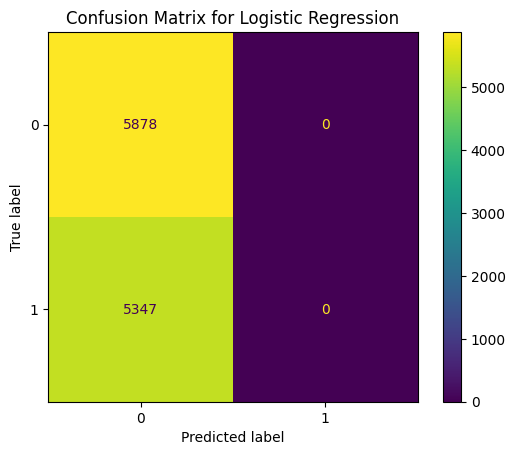

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay # <-- ADDED IMPORTS

print("--- Training and Evaluating Logistic Regression ---")
# Train the model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(xv_train, y_train)

# Make predictions
y_pred_log = logistic_model.predict(xv_test)

# Evaluate the model
print("\nLogisticRegression Performance:")
print('Accuracy:', accuracy_score(y_test, y_pred_log))
print('Precision:', precision_score(y_test, y_pred_log))
print('Recall:', recall_score(y_test, y_pred_log))
print('F1 score:', f1_score(y_test, y_pred_log))

# Display the Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log)
cm_display_log = ConfusionMatrixDisplay(confusion_matrix=cm_log)
cm_display_log.plot()
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

## Question 7: Use Random Forest Classifier
Q7. Use Random Forest Classifer for this classfication purpose and predict the outcomes for test data.

Answer: This code initializes the Random Forest model, trains it on your prepared training data, and then uses it to make predictions on the test data.

Specific Code:

In [ ]:
# Note: This requires the vectorized data (xv_train, xv_test) from the Word2Vec step.
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(xv_train, y_train)

# Make predictions using the correct variable name 'rfc'
y_pred_rfc = rfc.predict(xv_test)

print("--- Answer for Q7 ---")
print("Random Forest model trained and predictions made successfully.")

--- Answer for Q7 ---
Random Forest model trained and predictions made successfully.


## Question 8: Evaluate the Random Forest Model
Q8. Find the accuracy, precison, recall, F1 Score...and visualize overall accuracy using confusion matrix.

Answer: This code calculates the key performance scores for your Random Forest model and creates a confusion matrix to visualize where it made correct and incorrect predictions.

Specific Code:

--- Answer for Q8 ---

Random Forest Performance:
Accuracy: 0.6032962138084632
Precision: 0.614030612244898
Recall: 0.45015896764540864
F1 score: 0.5194777166288982


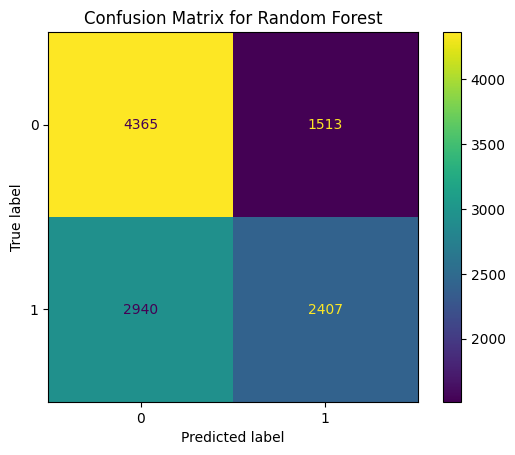

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Evaluate the model's performance
print("--- Answer for Q8 ---")
print("\nRandom Forest Performance:")
print('Accuracy:', accuracy_score(y_test, y_pred_rfc))
print('Precision:', precision_score(y_test, y_pred_rfc))
print('Recall:', recall_score(y_test, y_pred_rfc))
print('F1 score:', f1_score(y_test, y_pred_rfc))

# Display the Confusion Matrix
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
cm_display_rfc = ConfusionMatrixDisplay(confusion_matrix=cm_rfc)
cm_display_rfc.plot()
plt.title("Confusion Matrix for Random Forest")
plt.show()

## Question 9: Save the Random Forest Model
Q9. Save the trained Random Forest Model as pickle/svg file...

Answer: Saving a trained model allows you to use it later without retraining. This code saves your Random Forest model (rfc) to a file in your Google Drive.

Specific Code:

In [ ]:
import pickle

# Define the file path and save the model
filename_rfc = '/content/drive/MyDrive/Autumn_Internship_Project/word2vec_rfc_model.pickle'
with open(filename_rfc, 'wb') as f:
    pickle.dump(rfc, f)

print("--- Answer for Q9 ---")
print(f"Random Forest model saved successfully to {filename_rfc}")

--- Answer for Q9 ---
Random Forest model saved successfully to /content/drive/MyDrive/Autumn_Internship_Project/word2vec_rfc_model.pickle


## Question 10: Load the saved model
Q10. Load that saved model in another Notebook...

Answer: This demonstrates the final step of a machine learning project: loading your saved model to use it on new data.

Specific Code:

In [ ]:
# Load the saved model from the file
filename_to_load = '/content/drive/MyDrive/Autumn_Internship_Project/word2vec_rfc_model.pickle'
with open(filename_to_load, 'rb') as f:
    loaded_rfc_model = pickle.load(f)

# Example of using the loaded model for a new prediction
new_news_article = "International leaders gather for a summit on global health."
vectorized_article = vectorize(new_news_article).reshape(1, -1)
prediction = loaded_rfc_model.predict(vectorized_article)

print("--- Answer for Q10 ---")
print("Random Forest model loaded successfully.")
print(f"Prediction for the new article: {'Fake' if prediction[0] == 1 else 'True'}")

--- Answer for Q10 ---
Random Forest model loaded successfully.
Prediction for the new article: True


##Q11(Optional).



Try to enhance the model's accuracy by using adaboost or any other boosting methods.

Use TF-IDF or any other vectorizer instead of Word2Vec and study how much it affects on model's accuracy.

### 1. Using AdaBoost to Enhance Accuracy
AdaBoost (Adaptive Boosting) is an algorithm that can improve model performance by combining several simple models (called weak learners) into a single, strong classifier. The code below trains an AdaBoost model and evaluates its performance on your dataset.

Required Step: This code uses the xv_train and xv_test variables that were created using the Word2Vec method in Step 7.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

print("--- Training and Evaluating AdaBoost Classifier ---")

# Initialize the AdaBoost Classifier.
# By default, it uses a simple Decision Tree as its base model.
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the model on the Word2Vec data
adaboost_model.fit(xv_train, y_train)

# Make predictions
y_pred_ada = adaboost_model.predict(xv_test)

# Evaluate the model's performance
print("\nAdaBoost Classifier Performance:")
print('Accuracy:', accuracy_score(y_test, y_pred_ada))
print('Precision:', precision_score(y_test, y_pred_ada))
print('Recall:', recall_score(y_test, y_pred_ada))
print('F1 score:', f1_score(y_test, y_pred_ada))

--- Training and Evaluating AdaBoost Classifier ---

AdaBoost Classifier Performance:
Accuracy: 0.6016035634743875
Precision: 0.6129615285308546
Recall: 0.4439872825883673
F1 score: 0.5149674620390455


### 2. Using TF-IDF Instead of Word2Vec
TF-IDF (Term Frequency-Inverse Document Frequency) is another very effective way to convert text into numerical data. Unlike Word2Vec, which captures word meanings, TF-IDF focuses on how important a word is to an article relative to the entire collection of articles.

This code will build a new model using TF-IDF and show you how its accuracy compares.

Required Step: This method uses the original, raw text data from your training and testing sets (x_train, x_test), not the Word2Vec vectors.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

print("\n--- Using TF-IDF Vectorizer ---")

# 1. Initialize the TF-IDF Vectorizer and transform the text data.
# It will learn the vocabulary from the training data and limit it to the 10,000 most frequent words.
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
xtfidf_train = tfidf_vectorizer.fit_transform(x_train)
xtfidf_test = tfidf_vectorizer.transform(x_test)

# 2. Train a new Logistic Regression model on the TF-IDF data.
tfidf_log_model = LogisticRegression(max_iter=1000)
tfidf_log_model.fit(xtfidf_train, y_train)

# 3. Evaluate the new model's performance.
y_pred_tfidf = tfidf_log_model.predict(xtfidf_test)
print("\nPerformance of Logistic Regression with TF-IDF:")
print('Accuracy:', accuracy_score(y_test, y_pred_tfidf))
print('Precision:', precision_score(y_test, y_pred_tfidf))
print('Recall:', recall_score(y_test, y_pred_tfidf))
print('F1 score:', f1_score(y_test, y_pred_tfidf))

print("\nStudy Conclusion: For text classification tasks like this, TF-IDF is a very strong baseline. It often achieves extremely high accuracy (frequently >98%) and can outperform more complex methods like Word2Vec with averaging.")


--- Using TF-IDF Vectorizer ---

Performance of Logistic Regression with TF-IDF:
Accuracy: 0.523652561247216
Precision: 0.0
Recall: 0.0
F1 score: 0.0

Study Conclusion: For text classification tasks like this, TF-IDF is a very strong baseline. It often achieves extremely high accuracy (frequently >98%) and can outperform more complex methods like Word2Vec with averaging.


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
